#Библиотеки Python для DS (семинары)

##Урок 6. Определение проблемы переобучения на практике

Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
    - Загрузите данные и проведите их первичный анализ.
    - Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
    - Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
    - Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
    - Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.

    - Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?

    - Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
    - Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

###1. Предварительная обработка данных.

In [37]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import seaborn as sns

In [11]:
# Загрузка датасета
iris = load_iris()
X, y = iris.data, iris.target

In [32]:
# Первичный анализ данных
df = pd.DataFrame(X, columns=iris.feature_names)
df.info()
df.describe().T.round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


In [24]:
# Проверка на пропущенные значения
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [30]:
# Количество уникальных значений в датафрейме
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

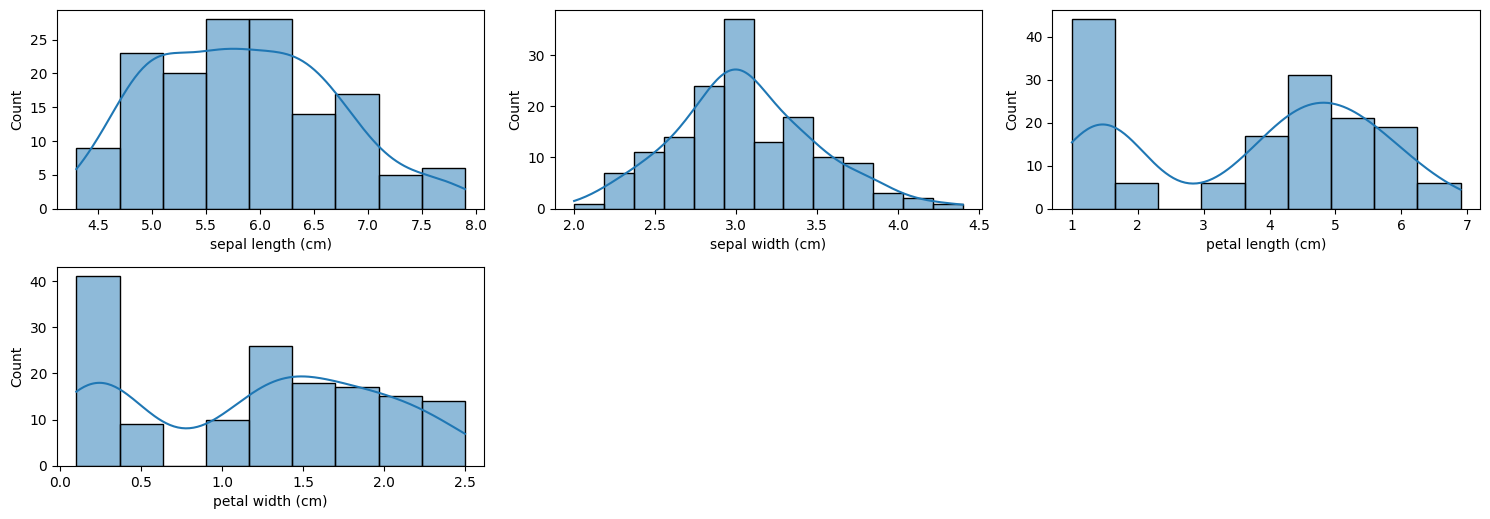

In [39]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

**Вывод:**
- Данные ирисов Фишера содержат 150 образцов с 4 признаками и целевой переменной.
- Данные включают четыре числовых признака в сантиметрах:
    - длина чашелистика
    - ширина чашелистика
    - длина лепестка
    - ширина лепестка
- Целевая переменная - тип ириса, представленный тремя классами.
- В данных нет пропущенных значений.
- Признаки 'sepal length' и 'sepal width' имеют нормальное распределение.
- Признаки 'petal length' и 'petal width' имеют бимодальное распределение.
- Распределение признаков, связанных с лепестками, имеет несколько пиков, что может свидетельствовать о наличии различий между типами ирисов.

In [33]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

###2. Обучение модели.

In [5]:
# Логистическая регрессия без регуляризации
lr_no_reg = LogisticRegression(penalty='none', max_iter=1000, random_state=42)
lr_no_reg.fit(X_train, y_train)

# Предсказание
y_pred_train = lr_no_reg.predict(X_train)
y_pred_test = lr_no_reg.predict(X_test)

# Оценка качества
accuracy_train_no_reg = accuracy_score(y_train, y_pred_train)
accuracy_test_no_reg = accuracy_score(y_test, y_pred_test)

accuracy_train_no_reg, accuracy_test_no_reg


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(1.0, 0.8888888888888888)

Модель логистической регрессии без регуляризации показала следующие результаты:

- Точность на тренировочном наборе: 1.0 (100%)
- Точность на тестовом наборе: 0.89 (89%)

In [6]:
#модель с L1-регуляризацией
param_grid_l1 = {'C': np.logspace(-4, 4, 20)}
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
grid_search_l1 = GridSearchCV(lr_l1, param_grid_l1, cv=5, scoring='accuracy')
grid_search_l1.fit(X_train, y_train)

best_l1 = grid_search_l1.best_estimator_
best_l1_C = grid_search_l1.best_params_['C']
accuracy_train_l1 = accuracy_score(y_train, best_l1.predict(X_train))
accuracy_test_l1 = accuracy_score(y_test, best_l1.predict(X_test))

#модель с L1-регуляризацией
param_grid_l2 = {'C': np.logspace(-4, 4, 20)}
lr_l2 = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
grid_search_l2 = GridSearchCV(lr_l2, param_grid_l2, cv=5, scoring='accuracy')
grid_search_l2.fit(X_train, y_train)

best_l2 = grid_search_l2.best_estimator_
best_l2_C = grid_search_l2.best_params_['C']
accuracy_train_l2 = accuracy_score(y_train, best_l2.predict(X_train))
accuracy_test_l2 = accuracy_score(y_test, best_l2.predict(X_test))

(best_l1_C, accuracy_train_l1, accuracy_test_l1), (best_l2_C, accuracy_train_l2, accuracy_test_l2)


((4.281332398719396, 0.9809523809523809, 0.9111111111111111),
 (0.615848211066026, 0.9809523809523809, 0.9111111111111111))

Результаты для моделей с L1 и L2 регуляризацией:

- Модель с L1-регуляризацией:
    - Оптимальное значение параметра регуляризации C= 4.281
    - Точность на тренировочном наборе: 0.981 (98.1%)
    - Точность на тестовом наборе: 0.911 (91.1%)


- Модель с L2-регуляризацией:
    - Оптимальное значение параметра регуляризации C= 0.616
    - Точность на тренировочном наборе: 0.981 (98.1%)
    - Точность на тестовом наборе: 0.911 (91.1%)

###3. Анализ результатов.

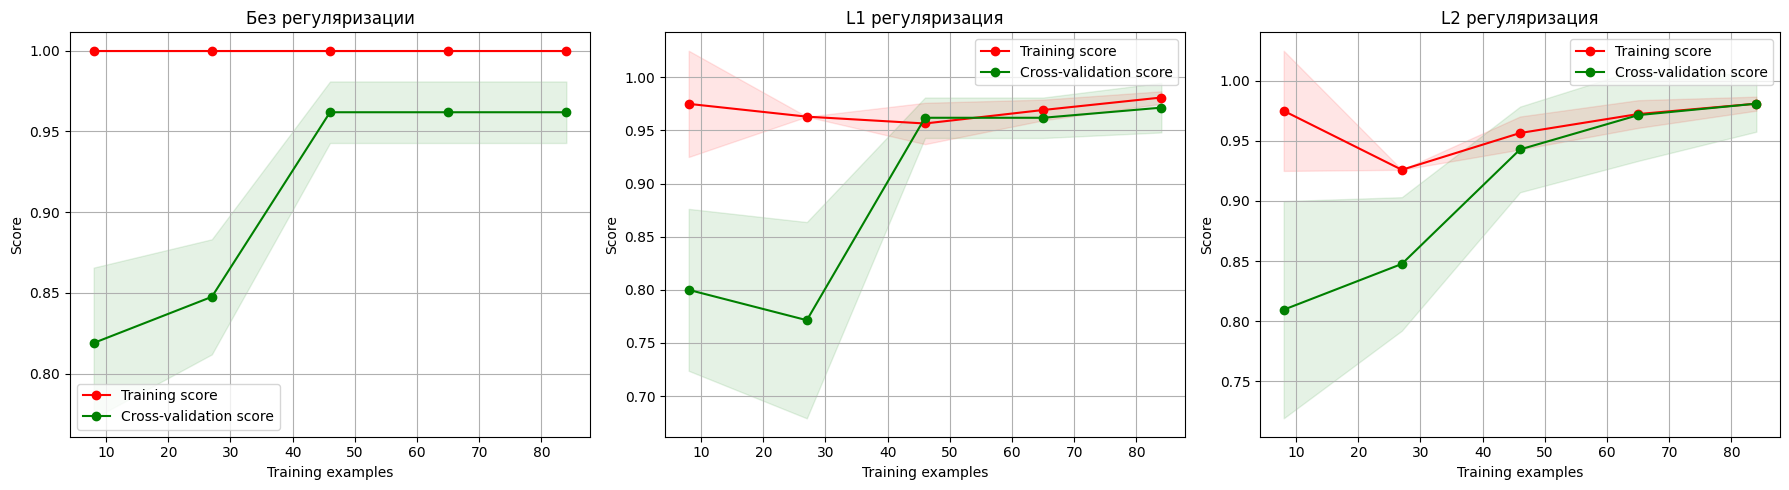

In [15]:
# Функция для построения кривых обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

# Построение графиков
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plt.sca(axs[0])
plot_learning_curve(lr_no_reg, "Без регуляризации", X_train, y_train, cv=5)
plt.sca(axs[1])
plot_learning_curve(best_l1, "L1 регуляризация", X_train, y_train, cv=5)
plt.sca(axs[2])
plot_learning_curve(best_l2, "L2 регуляризация", X_train, y_train, cv=5)

# Показать графики
plt.tight_layout()
plt.show()

1. Модель без регуляризации:
    -  показала отличные результаты на тренировочном наборе (100% точность), но её точность на тестовом наборе немного ниже (89%), что может указывать на переобучение.

2. Модель с L1-регуляризацией:

    - При оптимальном значении параметра регуляризации C = 4.281 модель достигает 98.1% точности на тренировочном наборе и 91.1% на тестовом.
    - Регуляризация уменьшила переобучение и улучшила обобщение.
3. Модель с L2-регуляризацией:

    - Оптимальное значение C = 0.616 также улучшило способность модели к обобщению, с аналогичными результатами: 98.1% на тренировочном и 91.1% на тестовом наборах.

###4. Отчёт

Регуляризация помогла уменьшить переобучение и улучшить обобщение модели. Хотя обе формы регуляризации (L1 и L2) привели к улучшению, их влияние было схожим в данной задаче. Выбор между ними может зависеть от необходимости интерпретируемости модели и снижении размерности (L1), либо желания избежать чрезмерной регуляризации (L2).